In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print(x_train.shape)
print(y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 145s 1us/step
(50000, 32, 32, 3)
(50000, 1)


In [4]:
def plot_sample(index):
  plt.figure(figsize = (10,1))
  plt.imshow(x_train[index])

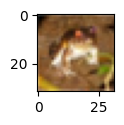

In [5]:
plot_sample(0)

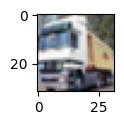

In [6]:
plot_sample(1)

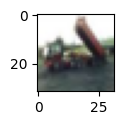

In [7]:
plot_sample(2)

In [8]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

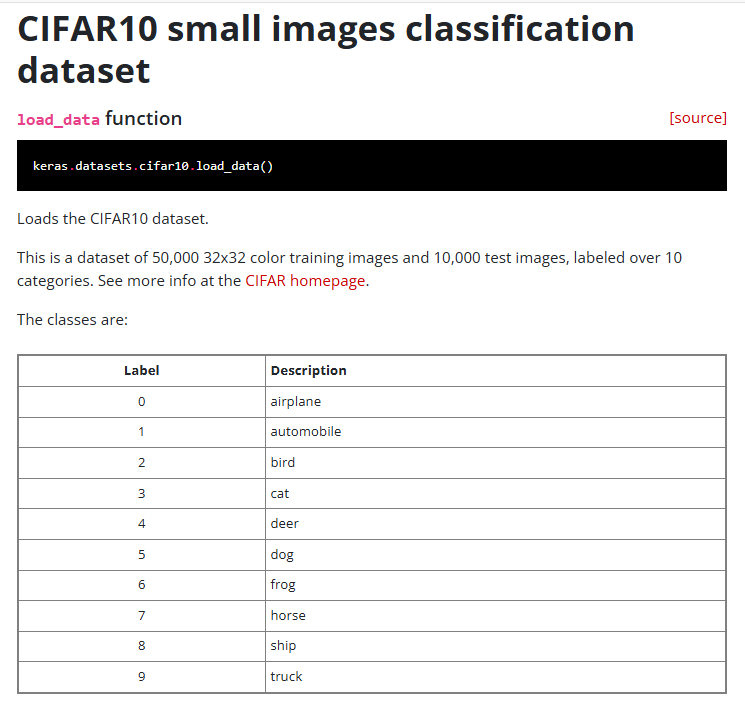

In [9]:
# y_train[3]
# array([4], dtype=uint8)

classes[y_train[3][0]]

'deer'

**<h2>SCALING AND PREPROCESSING</h2>**

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

y_train_categorical = keras.utils.to_categorical(
    y_train,num_classes=10
)

y_test_categorical = keras.utils.to_categorical(
    y_test,num_classes=10
)
 
y_train_categorical = y_train_categorical.astype('float32')
y_test_categorical = y_test_categorical.astype('float32')

float32


In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss= 'categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_scaled,y_train_categorical,epochs=50)

c:\Users\Anandhu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 190s 120ms/step - accuracy: 0.2718 - loss: 2.2519
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 175s 112ms/step - accuracy: 0.3948 - loss: 1.6782
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 192s 123ms/step - accuracy: 0.4352 - loss: 1.5825
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 190s 122ms/step - accuracy: 0.4496 - loss: 1.5278
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 192s 123ms/step - accuracy: 0.4668 - loss: 1.4943
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 178s 114ms/step - accuracy: 0.4727 - loss: 1.4585
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 188s 120ms/step - accuracy: 0.4854 - loss: 1.4307
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 173s 111ms/step - accuracy: 0.4923 - loss: 1.4075
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 190s 122ms/step - accuracy: 0.5086 - loss: 1.3744
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 187s 120ms/step - accuracy: 0.5121 - loss: 1.3569
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 172s 110ms/step - accuracy: 0.5156 -

In [18]:
model.predict(x_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[9.02599655e-03, 5.44608310e-02, 8.68101418e-02, ...,
        2.73722280e-02, 7.93363824e-02, 1.63641483e-01],
       [4.38318355e-04, 4.77889407e-04, 8.38539958e-01, ...,
        5.48582250e-07, 1.21030927e-01, 2.15557143e-02],
       [7.26825297e-01, 6.44251764e-01, 2.86182195e-01, ...,
        1.17299184e-01, 7.49577820e-01, 6.72351658e-01],
       ...,
       [2.60506826e-03, 1.33961163e-04, 5.93670011e-01, ...,
        4.25052315e-01, 1.15269166e-03, 5.86098875e-04],
       [6.00760744e-04, 3.79347354e-02, 1.37072802e-01, ...,
        6.56393170e-03, 4.58753482e-02, 2.31612544e-03],
       [1.75404906e-01, 1.97292218e-04, 4.39134479e-01, ...,
        9.56987679e-01, 1.76794440e-01, 4.06462960e-02]], dtype=float32)

In [21]:
print(model.predict(x_test_scaled)[0])
print(np.argmax(model.predict(x_test_scaled)[0]))

classes[y_test[0][0]]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[0.009026   0.05446083 0.08681014 0.49855828 0.2512102  0.4861378
 0.03785894 0.02737223 0.07933638 0.16364148]
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
3


'cat'

In [22]:
print(model.predict(x_test_scaled)[1])
print(np.argmax(model.predict(x_test_scaled)[1]))

classes[y_test[1][0]]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[4.3831836e-04 4.7788941e-04 8.3853996e-01 9.2848071e-13 1.7546377e-10
 3.2245477e-09 4.9630100e-12 5.4858225e-07 1.2103093e-01 2.1555714e-02]
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
2


'ship'

In [25]:
model.evaluate(x_test_scaled,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4934 - loss: 1.7834


[1.8229658603668213, 0.48669999837875366]